Partiendo de la limpieza de datos hecha previamente, se utiliza LSTM para predecir la producción.

## Cosas pendientes de hacer y/o definir


1.   



In [2]:
import math
import itertools
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
#dataset = pd.read_csv("/content/drive/MyDrive/Trabajo profesional (private)/output_file_train_dataset.csv", index_col=0)
dataset = pd.read_csv("/content/drive/MyDrive/Trabajo profesional/Code/data/prod_merge_2024-03-30_02:38:49.csv", index_col=0)
dataset.info()

<ipython-input-4-02f40d5a2f1d>:2: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/content/drive/MyDrive/Trabajo profesional/Code/data/prod_merge_2024-03-30_02:38:49.csv", index_col=0)


<class 'pandas.core.frame.DataFrame'>
Index: 276318 entries, 0 to 276317
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idempresa                276318 non-null  object 
 1   anio                     276318 non-null  int64  
 2   mes                      276318 non-null  int64  
 3   idpozo                   276318 non-null  int64  
 4   prod_pet                 276318 non-null  float64
 5   prod_gas                 276318 non-null  float64
 6   prod_agua                276318 non-null  float64
 7   iny_agua                 276318 non-null  float64
 8   iny_gas                  276318 non-null  float64
 9   iny_co2                  276318 non-null  float64
 10  iny_otro                 276318 non-null  float64
 11  tef                      276318 non-null  float64
 12  vida_util                5813 non-null    float64
 13  tipoextraccion           276318 non-null  object 
 14  tipoestad

In [ ]:
mes_values = dataset['mes'].values

# Analisis exploratorio para ver los posibles valores de los meses.
print("Values of the 'mes' column:")
for value in mes_values:
  print(value)

In [ ]:
# Buscamos los pozos con mayor produccion, pero solo como análisis exploratorio.
dataset.groupby(["idpozo"])["prod_pet"].sum().sort_values()

idpozo
164767         0.00
158087         0.00
158086         0.00
161110         0.00
147538         0.00
            ...    
160693    160547.21
160932    168272.26
160694    177977.27
159848    182093.69
162246    182818.81
Name: prod_pet, Length: 3717, dtype: float64

In [ ]:
test_dataset = pd.read_csv("/content/drive/MyDrive/Trabajo profesional (private)/deleted_rows_test_dataset.csv", index_col=0)

In [ ]:
# Extract the relevant features
#features = dataset[['anio', 'mes', 'idpozo', 'prod_pet']].values

# Select all columns except for the target variable 'prod_pet'
features = dataset.drop(columns=['prod_pet']).values

features


array([['YSUR', 2015, 1, ..., 14800.76597, 2687.898, 2787.81],
       ['YSUR', 2016, 1, ..., 14800.76597, 2687.898, 2787.81],
       ['YSUR', 2017, 1, ..., 14800.76597, 2687.898, 2787.81],
       ...,
       ['ACO', 2023, 8, ..., 5198.485327, 1085.589409, 79.99305556],
       ['ACO', 2023, 9, ..., 5198.485327, 1085.589409, 79.99305556],
       ['ACO', 2023, 10, ..., 5198.485327, 1085.589409, 79.99305556]],
      dtype=object)

In [ ]:

# Extract the relevant features
features = dataset[['anio', 'mes', 'idpozo', 'prod_pet']].values

# Select all columns except for the target variable 'prod_pet'
#features = dataset.drop(columns=['prod_pet']).values

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Define the sequence length (number of time steps to look back)
sequence_length = 1#6

# Convert data into sequences
# Las secuencias de entrada proporcionan la información necesaria para el modelo
# aprender los patrones en los datos, mientras que las secuencias de salida
# representan los resultados esperados que el modelo intentará predecir.
# Durante el entrenamiento del modelo, se ajustan los parámetros del modelo para
# minimizar la diferencia entre las secuencias de salida predichas y las
# secuencias de salida reales.
X, y = [], []
#for i in range(len(scaled_features) - sequence_length):
#    X.append(scaled_features[i:i+sequence_length, :-1])
#    y.append(scaled_features[i+sequence_length, -1])

for i in range(len(scaled_features) - sequence_length - 1):
    X.append(scaled_features[i:i+sequence_length, :-1])
    y.append(scaled_features[i+sequence_length, -1])

X, y = np.array(X), np.array(y)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,
               input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions
predictions = model.predict(X_test)

In [ ]:
# Cada predicción en el array predictions es un valor pronosticado de la variable
# objetivo ('prod_pet') para una muestra específica en el conjunto de datos de prueba.

# En el código, estamos utilizando un modelo LSTM para predecir los valores de
# 'prod_pet' en función de las características de entrada (por ejemplo, 'anio', 'mes', 'idpozo').
# Después de entrenar el modelo, realizamos predicciones en el conjunto de datos de
# prueba usando la función model.predict(X_test), que devuelve un array de valores predichos.

# Cada predicción corresponde a una muestra en el conjunto de datos de prueba.
# Por ejemplo, si tenemos 100 muestras en el conjunto de datos de prueba, tendremos
# 100 predicciones en el array predictions.

# Cada predicción representa el valor pronosticado por el modelo para la variable
# 'prod_pet' para la muestra correspondiente en el conjunto de datos de prueba.
# Estos valores estan escalados (normalizados) porque aplicamos un escalado
# de características durante el preprocesamiento. Si se quiere interpretar las
# predicciones en la escala original, se debe invertir la transformación
# usando el mismo escalador que utilizamos durante el preprocesamiento.

print("Predicted 'prod_pet' values:")
for pred in predictions:
    print(pred)

In [1]:
# SIN normalizar, los errores son muy altos. Por ende, la solucion utilizada
# a continuacion no es aplicable.

# Extract the relevant features
features = dataset[['anio', 'mes', 'idpozo', 'prod_pet']].values

# Define the sequence length (number of time steps to look back)
sequence_length = 6

# Convert data into sequences
X, y = [], []
for i in range(len(features) - sequence_length - 1):
    X.append(features[i:i+sequence_length, :-1])
    y.append(features[i+sequence_length, -1])

X, y = np.array(X), np.array(y)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,
               input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions
predictions = model.predict(X_test)


NameError: name 'dataset' is not defined

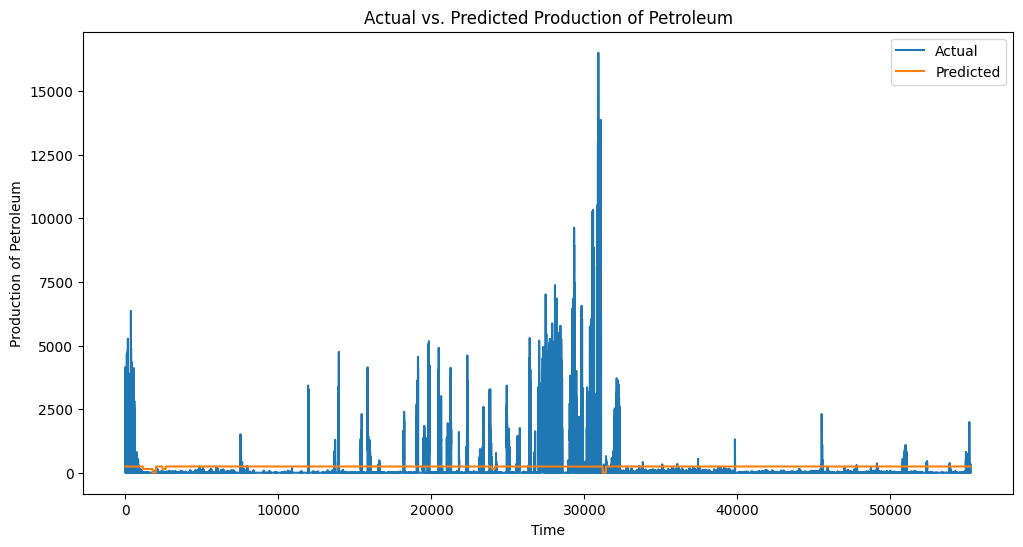

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Production of Petroleum')
plt.title('Actual vs. Predicted Production of Petroleum')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 312.23025071601717


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 371808.9302497343


In [ ]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 609.7613715624616


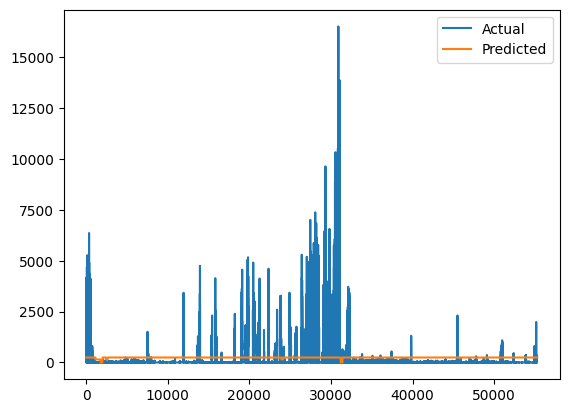

In [ ]:
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()



In [ ]:
residuals = y_test - predictions
plt.plot(residuals)
plt.xlabel('Index')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()


In [ ]:
# Seleccionar características relevantes
features = ['prod_pet', 'anio', 'mes', 'idpozo']

# Filtrar características
data = dataset[features]

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Función para crear secuencias de datos y etiquetas
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # prod_pet es la primera columna
    return np.array(X), np.array(y)

# Definir longitud de la secuencia temporal
seq_length = 10  # Puedes ajustar este valor

# Crear secuencias de datos y etiquetas
X, y = create_sequences(scaled_data, seq_length)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construir modelo LSTM
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compilar modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar modelo
loss = model.evaluate(X_test, y_test)
print('Loss:', loss)

# Hacer predicciones
predictions = model.predict(X_test)

# Invertir la escala de las predicciones
predictions = scaler.inverse_transform(np.concatenate((np.zeros((len(predictions), len(features) - 1)), predictions), axis=1))[:, 0]

# Puedes continuar trabajando con las predicciones aquí


Epoch 1/50
6908/6908 [==============================] - 63s 9ms/step - loss: 0.0010 - val_loss: 6.1102e-04
Epoch 2/50
6908/6908 [==============================] - 60s 9ms/step - loss: 9.2124e-04 - val_loss: 6.0116e-04
Epoch 3/50
6908/6908 [==============================] - 57s 8ms/step - loss: 8.2900e-04 - val_loss: 5.6573e-04
Epoch 4/50
6908/6908 [==============================] - 55s 8ms/step - loss: 7.7490e-04 - val_loss: 5.4425e-04
Epoch 5/50
6908/6908 [==============================] - 55s 8ms/step - loss: 7.3657e-04 - val_loss: 5.4523e-04
Epoch 6/50
6908/6908 [==============================] - 63s 9ms/step - loss: 6.9356e-04 - val_loss: 5.1647e-04
Epoch 7/50
6908/6908 [==============================] - 66s 10ms/step - loss: 6.6533e-04 - val_loss: 4.9532e-04
Epoch 8/50
6908/6908 [==============================] - 57s 8ms/step - loss: 6.4159e-04 - val_loss: 5.0491e-04
Epoch 9/50
6908/6908 [==============================] - 55s 8ms/step - loss: 6.1758e-04 - val_loss: 4.6720e-04
Epoc